# Real Estate Pricing Tier Classification by Thai, Laxmi, and Daniel

### Data Cleaning & Preparation - Thai

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('realtor-data.zip.csv')

# Inspect the data
print(df.head())
print(df.info())

# Remove columns that are irrelavant
df.drop(['status', 'prev_sold_date', 'zip_code'], axis=1, inplace=True)

# Handle missing values for numerical columns by imputing with the median
numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.fillna(x.median()), axis=0)

# Assuming 'city' and 'state' are the only categorical columns with missing values
# Handle missing values for categorical columns by imputing with the mode (most common value)
categorical_columns = ['city', 'state']
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# Recheck info
print(df.info())

# Save the cleaned dataset
df.to_csv('clean-realtor-data.zip.csv', index=False)

     status  bed  bath  acre_lot        city        state  zip_code  \
0  for_sale  3.0   2.0      0.12    Adjuntas  Puerto Rico     601.0   
1  for_sale  4.0   2.0      0.08    Adjuntas  Puerto Rico     601.0   
2  for_sale  2.0   1.0      0.15  Juana Diaz  Puerto Rico     795.0   
3  for_sale  4.0   2.0      0.10       Ponce  Puerto Rico     731.0   
4  for_sale  6.0   2.0      0.05    Mayaguez  Puerto Rico     680.0   

   house_size prev_sold_date     price  
0       920.0            NaN  105000.0  
1      1527.0            NaN   80000.0  
2       748.0            NaN   67000.0  
3      1800.0            NaN  145000.0  
4         NaN            NaN   65000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4069420 entries, 0 to 4069419
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   status          object 
 1   bed             float64
 2   bath            float64
 3   acre_lot        float64
 4   city            object 
 5   state 

### Exploratory Data Analysis - Laxmi

In [4]:
# Descriptive statistics for numerical columns
df.describe()

,bed,bath,acre_lot,house_size,price
count,4.069420e+06,4.069420e+06,4.069420e+06,4.069420e+06,4.069420e+06
mean,3.268426e+00,2.408169e+00,1.612482e+01,2.020918e+03,5.623551e+05
std,1.586825e+00,1.401560e+00,8.873785e+02,7.458365e+03,3.336220e+06
min,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
25%,3.000000e+00,2.000000e+00,1.800000e-01,1.460000e+03,1.550000e+05
50%,3.000000e+00,2.000000e+00,3.300000e-01,1.760000e+03,3.249000e+05
75%,4.000000e+00,3.000000e+00,8.000000e-01,2.112000e+03,5.790000e+05
max,4.730000e+02,2.120000e+02,1.000000e+05,9.842382e+06,2.147484e+09


In [5]:
# Descriptive statistics for object columns
df.describe(include = 'object')

,city,state
count,4069420,4069420
unique,8798,35
top,Washington,New York
freq,103173,718621


In [6]:
# Counts of unique values in descending order
df.value_counts()

bed  bath  acre_lot  city              state           house_size  price    
3.0  2.0   0.34      Vienna            Georgia         1760.0      152469.0     753
     3.0   0.33      Morgantown        West Virginia   1821.0      295000.0     291
     2.0   0.23      Palm Bay          Florida         1760.0      35000.0      261
1.0  1.0   0.33      New York          New York        1760.0      499000.0     243
3.0  3.0   0.33      Morgantown        West Virginia   1940.0      280000.0     234
                                                                               ... 
     2.0   10.68     Purlear           North Carolina  1760.0      49900.0        1
2.0  3.0   0.33      Pompano Beach     Florida         1903.0      761200.0       1
3.0  2.0   0.24      Placida           Florida         1760.0      1000000.0      1
           10.69     Creston           North Carolina  1760.0      75000.0        1
2.0  2.0   0.04      North Fort Myers  Florida         1760.0      26900.0        1

In [7]:
# Remove duplicate rows
print(df.duplicated().sum())
df_filtered = df.copy()
df_filtered.drop_duplicates(inplace=True)
print(df_filtered.duplicated().sum())

3471523
0


In [8]:
# Check for missing values
df_filtered.isnull().sum()

bed           0
bath          0
acre_lot      0
city          0
state         0
house_size    0
price         0
dtype: int64

In [9]:
# Check for missing values
df_filtered.isna().sum()

bed           0
bath          0
acre_lot      0
city          0
state         0
house_size    0
price         0
dtype: int64

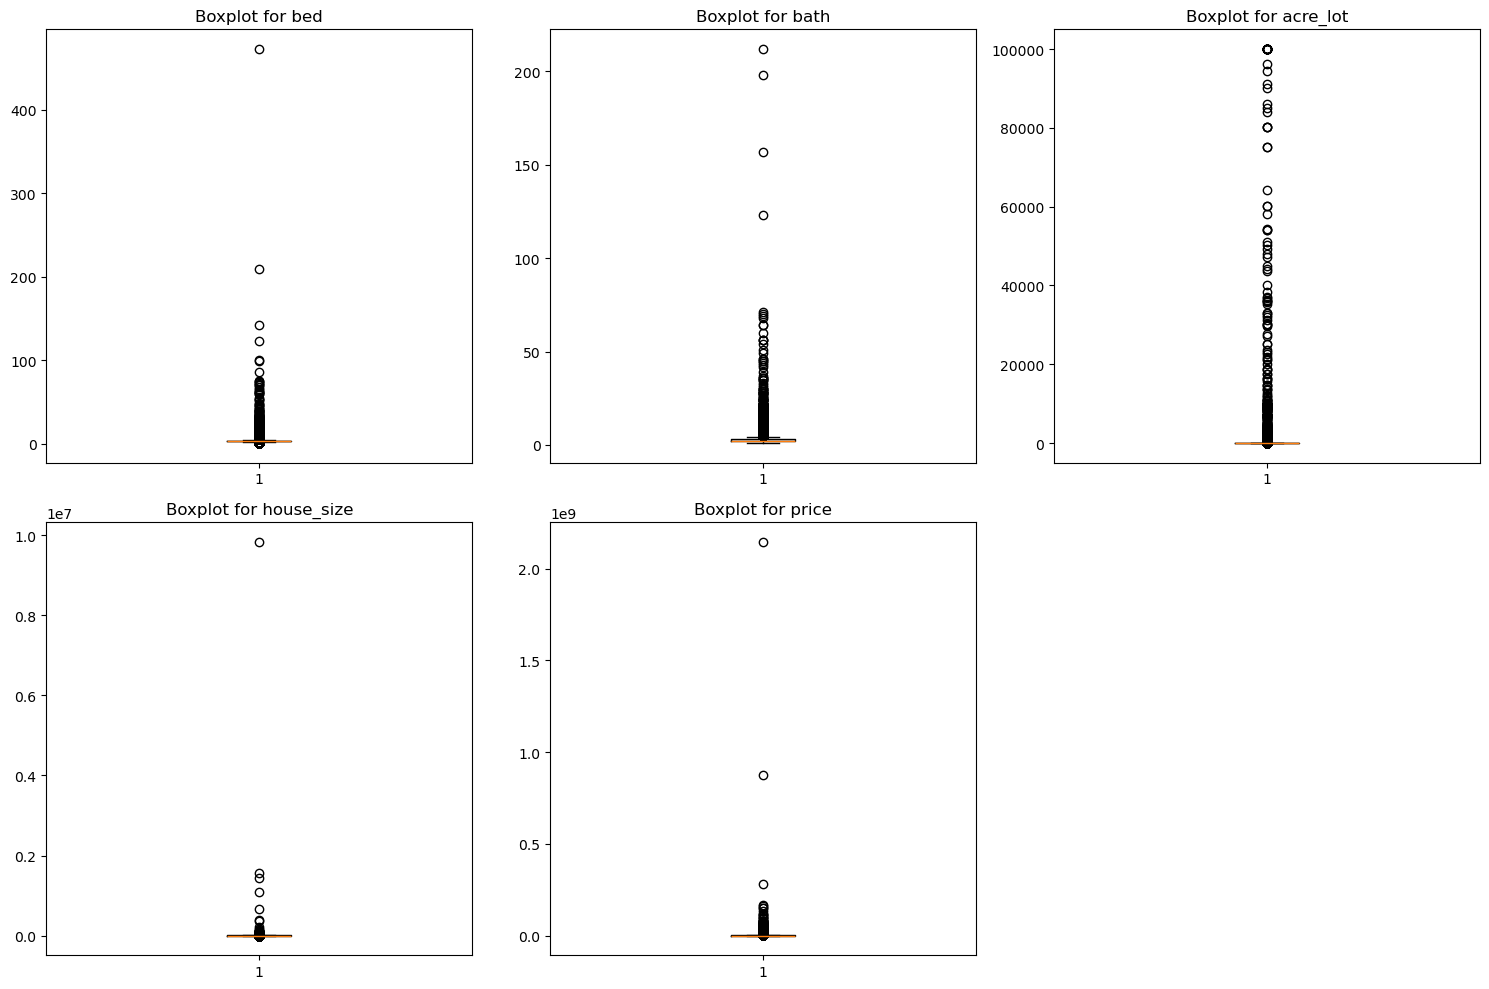

In [10]:
# Check for outliers with boxplot for numerical columns

# Create a figure and a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot data on the first 5 subplots
axs[0, 0].boxplot(df_filtered[numerical_columns[0]])
axs[0, 0].set_title(f'Boxplot for {numerical_columns[0]}')

axs[0, 1].boxplot(df_filtered[numerical_columns[1]])
axs[0, 1].set_title(f'Boxplot for {numerical_columns[1]}')

axs[0, 2].boxplot(df_filtered[numerical_columns[2]])
axs[0, 2].set_title(f'Boxplot for {numerical_columns[2]}')

axs[1, 0].boxplot(df_filtered[numerical_columns[3]])
axs[1, 0].set_title(f'Boxplot for {numerical_columns[3]}')

axs[1, 1].boxplot(df_filtered[numerical_columns[4]])
axs[1, 1].set_title(f'Boxplot for {numerical_columns[4]}')

# Remove the last (empty) subplot
fig.delaxes(axs[1][2])

# Display the figure with subplots
plt.tight_layout()
plt.show()

In [11]:
# Remove outliers for numerical columns

# Print total number of rows in filtered dataframe
print(f'Total rows with outliers : {df_filtered.shape[0]}')

# Copy dataframe 
df_no_outliers = df_filtered.copy()

# Loop through numerical columns
for col in numerical_columns:
    # Calculate IQR
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

    # Print total number of rows after removal of outliers
    print(f'Total rows with out outliers for column {col} : {df_no_outliers.shape[0]}')

Total rows with outliers : 597897
Total rows with out outliers for column bed : 556417
Total rows with out outliers for column bath : 538017
Total rows with out outliers for column acre_lot : 455942
Total rows with out outliers for column house_size : 417972
Total rows with out outliers for column price : 393584


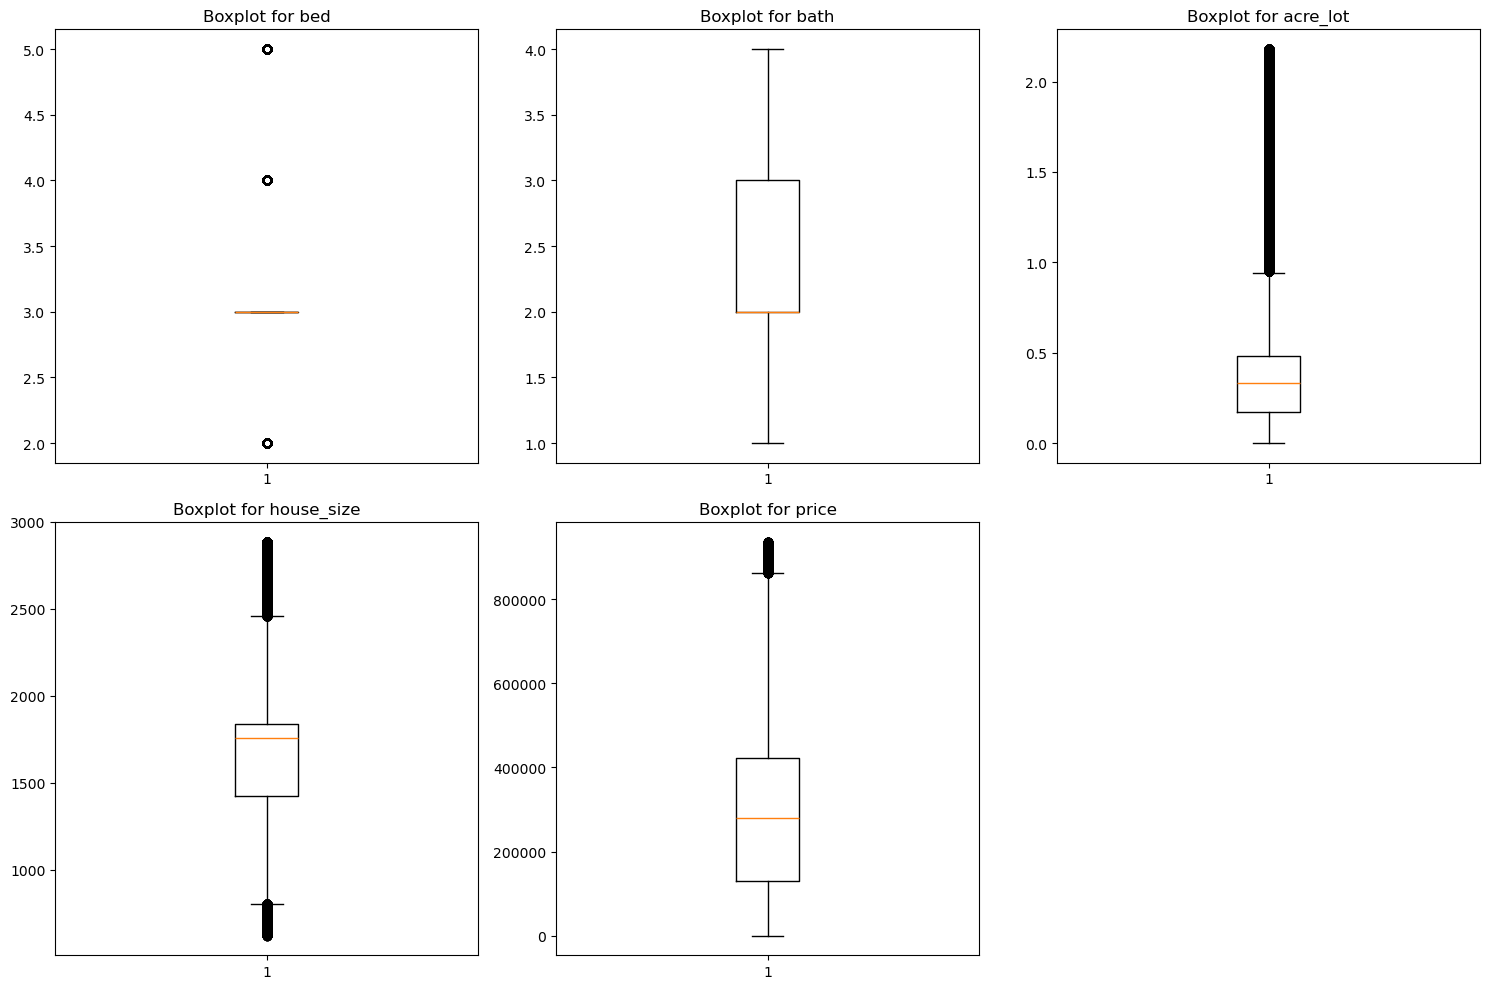

In [12]:
# Plot boxplots after removal of outliers from numerical columns

# Create a figure and a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot data on the first 5 subplots
axs[0, 0].boxplot(df_no_outliers[numerical_columns[0]])
axs[0, 0].set_title(f'Boxplot for {numerical_columns[0]}')

axs[0, 1].boxplot(df_no_outliers[numerical_columns[1]])
axs[0, 1].set_title(f'Boxplot for {numerical_columns[1]}')

axs[0, 2].boxplot(df_no_outliers[numerical_columns[2]])
axs[0, 2].set_title(f'Boxplot for {numerical_columns[2]}')

axs[1, 0].boxplot(df_no_outliers[numerical_columns[3]])
axs[1, 0].set_title(f'Boxplot for {numerical_columns[3]}')

axs[1, 1].boxplot(df_no_outliers[numerical_columns[4]])
axs[1, 1].set_title(f'Boxplot for {numerical_columns[4]}')

# Remove the last (empty) subplot
fig.delaxes(axs[1][2])

# Display the figure with subplots
plt.tight_layout()
plt.show()

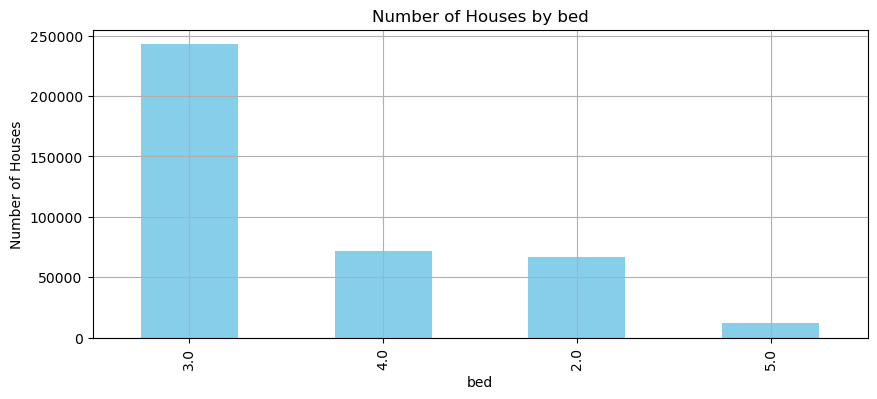

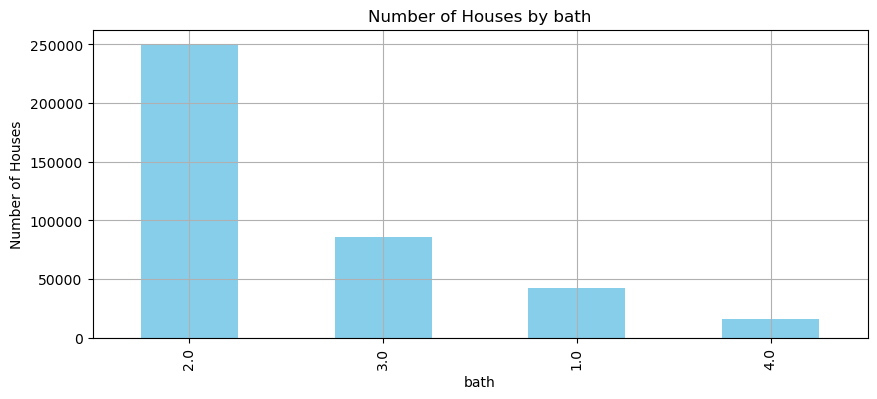

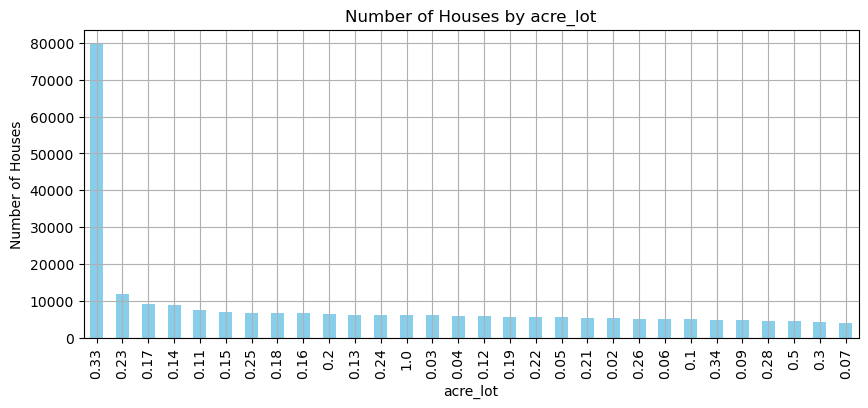

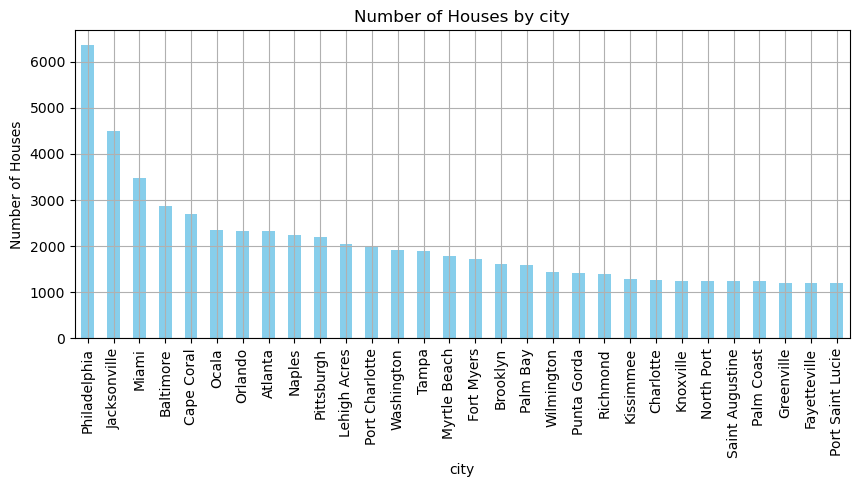

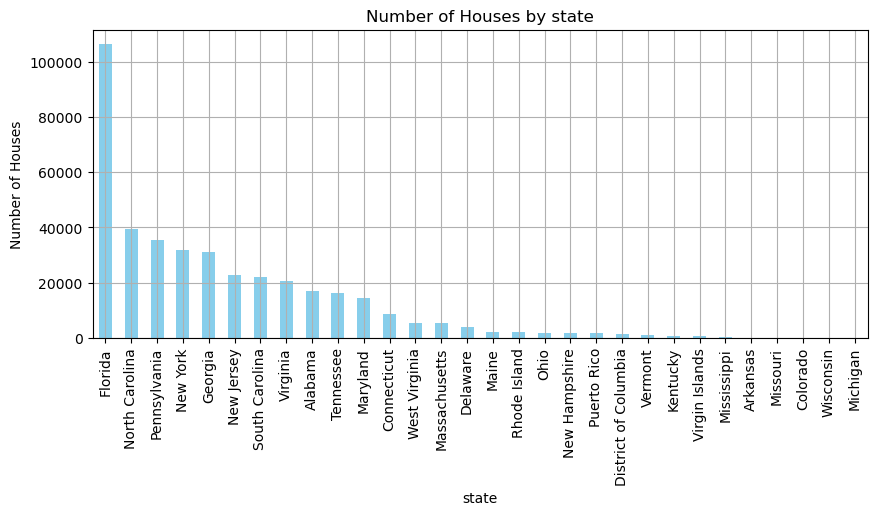

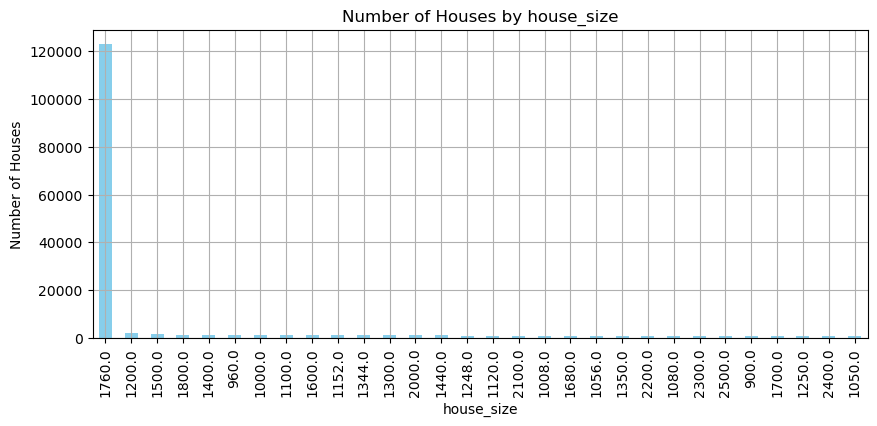

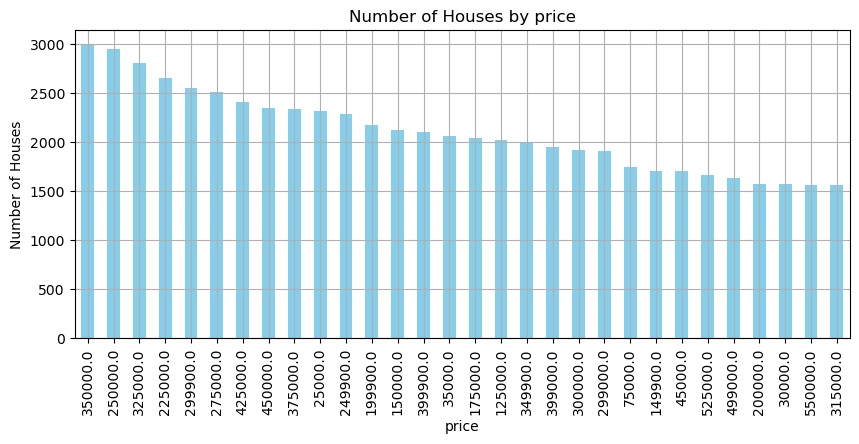

In [13]:
# Plot bar graph for each column
for col in df.columns:
    # Pick top 30 unique counts for bar chart
    df_no_outliers[col].value_counts().head(30).plot(kind='bar', figsize=(10,4), color='skyblue')

    # Set title, labels and display
    plt.title(f'Number of Houses by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Houses')
    plt.grid(True)
    plt.show()

In [14]:
# Group by state, city, bed and bath
# Display mean values for acre_lot, house_size and price
df_no_outliers.groupby(['state', 'city', 'bed', 'bath']).agg({'acre_lot' : 'mean', 'house_size' : 'mean', 'price' : 'mean'})

acre_lot   house_size          price
state         city           bed bath                                      
Alabama       Abbeville      2.0 1.0   0.665000  1041.500000   81500.000000
                                 2.0   0.715000  1111.000000  111700.000000
                             3.0 1.0   0.290000   970.000000   33494.000000
                                 2.0   0.613265  1734.367347  102894.897959
                             4.0 2.0   0.476667  1818.000000  364833.333333
...                                         ...          ...            ...
West Virginia Winifrede      3.0 2.0   0.600000  1424.000000  129900.000000
              Wyoming        4.0 2.0   0.170000  1860.000000   62500.000000
              Yellow Spring  3.0 2.0   1.000000  1200.000000  249900.000000
Wisconsin     Baileys Harbor 2.0 2.0   0.330000  1144.000000  429900.000000
Wyoming       Cody           3.0 3.0   0.290000  1935.000000  535000.000000

[45760 rows x 3 columns]

In [15]:
# Create target column 'Price Tier'

# Append a column for price per acre
df_no_outliers['price_per_acre'] = df_no_outliers['price'] / df_no_outliers['acre_lot']

# Define price tier thresholds
low_threshold = 500000 
high_threshold = 10000000 

# Assign labels based on price per acre
df_no_outliers['price_tier'] = pd.cut(
    df_no_outliers['price_per_acre'],
    bins=[0, low_threshold, high_threshold, float('inf')],
    labels=['Low', 'Medium', 'High']
)

# Counts of unique values in descending order for price_tier
df_no_outliers['price_tier'].value_counts()

price_tier
Medium    247219
Low       134066
High       12274
Name: count, dtype: int64

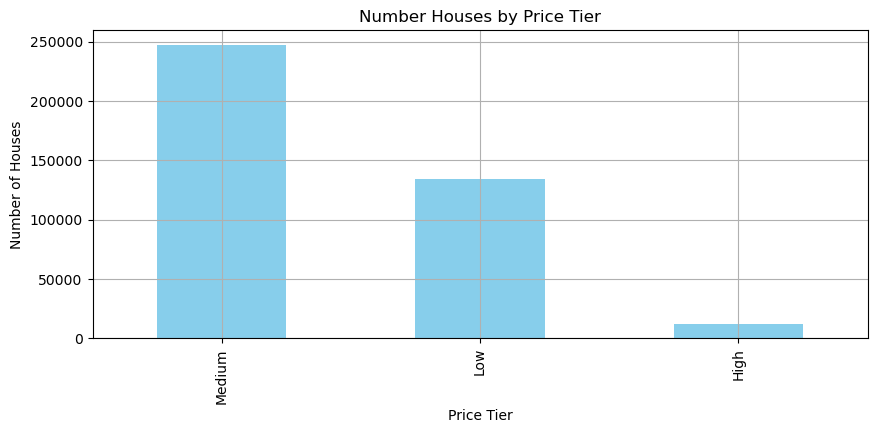

In [16]:
# Plot number of houses by price tier
df_no_outliers['price_tier'].value_counts().plot(kind='bar', figsize=(10,4), color='skyblue')

# Set title, labels and display
plt.title(f'Number Houses by Price Tier')
plt.xlabel('Price Tier')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()

price_tier      Low   Medium    High
bed bath                            
2.0 1.0      6598.0  12078.0   628.0
    2.0      7211.0  31745.0  1883.0
    3.0       365.0   5304.0   886.0
    4.0        26.0    281.0    80.0
3.0 1.0      6732.0  13137.0   467.0
    2.0     98012.0  77952.0  2114.0
    3.0      4139.0  32481.0  2516.0
    4.0       276.0   3661.0  1372.0
4.0 1.0       702.0   1625.0    46.0
    2.0      4331.0  23220.0   455.0
    3.0      3738.0  29373.0   710.0
    4.0       596.0   6196.0   680.0
5.0 1.0        55.0    207.0    10.0
    2.0       495.0   2426.0   164.0
    3.0       598.0   5376.0   189.0
    4.0       192.0   2157.0    74.0


C:\Users\obbs6\AppData\Local\Temp\ipykernel_16100\2162046975.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_no_outliers.groupby(['bed', 'bath', 'price_tier']).size().reset_index(name='count')


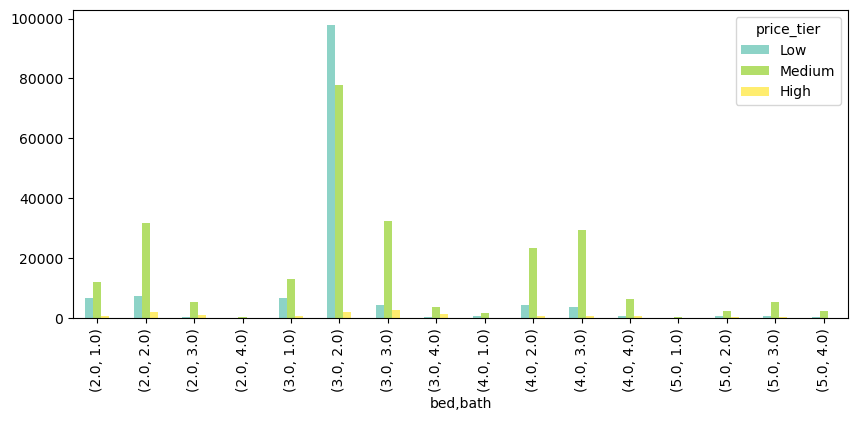

In [17]:
# Plot distribution of price tier by number of beds and baths

# Group data by bed, bath and price tier
grouped = df_no_outliers.groupby(['bed', 'bath', 'price_tier']).size().reset_index(name='count')

# Create and print pivot table 
pivot_table = pd.pivot_table(grouped, values='count', index=['bed', 'bath'], columns=['price_tier'])
print(pivot_table)

# Plot bar chart for pivot table
pivot_table.plot(kind='bar', figsize=(10,4), colormap='Set3')
plt.show()